# Machine Learning and Neural Networks Midterm

# Comparison of different Supervised Machine Learning Algorithms

# 1. Abstract

The Aim of the project is to compare the performance of two machine learning algorithms, such as k-Nearest Neighbors (kNN) and Decision Trees, on the sklearn Wine dataset. The focus of this project is on identifying which algorithm performs better in classifying wine types based on their chemical characteristics. The finding was that the kNN algorithm performed better when the correct k is chosen. Otherwise, decision trees and kNN perform just as well as one another on this dataset.

# 2. Introduction

Machine Learning is a branch in artificial intelligence(AI) and Computer Science which has a focus on imitating the way humans learn, this means that machine learning algorthms gradually improve their acuuracy over time.

Although there are some variations in how to group machine learning algorithms, they can be broadly classified into three categories based on their purposes and the way the underlying machine is being taught: supervised, unsupervised, and semi-supervised. In its most basic form, machine learning uses programmed algorithms that learn and optimise their operations by analysing input data to make predictions within an acceptable range. With the feeding of new data, these algorithms tend to make more accurate predictions.
 
Supervised machine learning techniques classify data into similar categories by feeding the trained algorithm into an unlabeled test dataset after it has been trained on a labelled training dataset.
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-1004-8

Thirteen distinct chemical markers were recorded in the sklearn Wine dataset, which is the outcome of a chemical examination of wines grown by three different farmers in the same region of Italy. The dataset presents a classification problem because the wines belong to various classes. This dataset makes a great example dataset to showcase different classification machine learning algorithms. There are various projects that explore this dataset [https://medium.com/@erkansahin/a-statistical-approach-on-the-wine-dataset-98a2f7b77975].

The goal of the project is to train a machine learning algoririthm to predict the class of wine given the 13 measured parameters and find out major differences between each class.

This aim is interesting because the methodology used in this project can be used on other datasets that have classification problems.

# 3. Background

I will be investigating the following supervised learning techniques: Logistic Regression, Decision Tree, Random Forest and K-Nearest Neighbour.

Decision tree (DT) is one of the earliest and prominent machine learning algorithms. A decision tree models the decision logics i.e., tests and corresponds outcomes for classifying data items into a tree-like structure. The nodes of a DT tree normally have multiple levels where the first or top-most node is called the root node. All internal nodes (i.e., nodes having at least one child) represent tests on input variables or attributes. Depending on the test outcome, the classification algorithm branches towards the appropriate child node where the process of test and branching repeats until it reaches the leaf node [24]. The leaf or terminal nodes correspond to the decision outcomes. DTs have been found easy to interpret and quick to learn, and are a common component to many medical diagnostic protocols [25]. When traversing the tree for the classification of a sample, the outcomes of all tests at each node along the path will provide sufficient information to conjecture about its class. 

The K-nearest neighbour (KNN) algorithm is one of the simplest and earliest classification algorithms [29]. It can be thought a simpler version of an NB classifier. Unlike the NB technique, the KNN algorithm does not require to consider probability values. The ‘K’ is the KNN algorithm is the number of nearest neighbours considered to take ‘vote’ from. The selection of different values for ‘K’ can generate different classification results for the same sample object. Figure 6 shows an illustration of how the KNN works to classify a new object. For K = 3, the new object (star) is classified as ‘black’; however, it has been classified as ‘red’ when K = 5.


k-Nearest Neighbors (kNN):

Basic Concept: Explain how kNN works, including the idea of classifying a data point based on the majority vote of its 'k' nearest neighbors.
Distance Metrics: Discuss the concept of distance in kNN, particularly Euclidean distance, and its role in the algorithm.
Choosing 'k': Discuss how the choice of 'k' affects the algorithm, including the trade-off between bias and variance.
Strengths and Weaknesses: Briefly discuss where kNN performs well and its limitations (like being sensitive to the scale of data and its computational cost).
Decision Trees:

Algorithm Overview: Explain the basic idea behind Decision Trees, how they split the data based on certain criteria, and form a tree-like model of decisions.
Criteria for Splitting: Discuss concepts like Information Gain, Gini Impurity, and Entropy, which are commonly used for deciding splits in the tree.
Pruning: Explain what tree pruning is and why it's important to prevent overfitting.
Strengths and Weaknesses: Highlight the advantages of Decision Trees (like being easy to interpret) and their disadvantages (such as susceptibility to overfitting).
Comparative Analysis: Since your project compares these two algorithms, you might also want to include a brief discussion on why comparing them is meaningful. For instance, contrasting their complexity, interpretability, and scalability can be insightful.

Relevant Theoretical Concepts: If your project uses specific concepts like cross-validation, scaling of features, or particular metrics for evaluation, briefly explain these concepts and their relevance to your project.

# 4. Methodology, Analysis, and Evaluation

## 4.1 Preprocessing

The preprocessing of the data involves splitting the data into training and test sets. The data then needs to be scaled to normalize feature values.

1.) Load the Dataset: Import the necessary libraries and load the Wine dataset from sklearn.

2.) Split the Dataset: Split the dataset into training and test sets. This is crucial for evaluating the performance of your machine learning models.

3.) Scale the Features: Normalize the features using standard scaling. This step is important because features in the Wine dataset might be on different scales, and many machine learning algorithms perform better on scaled data.

4.) Feature Selection: Select relevant features from the dataset . This step involves choosing a subset of relevant features (variables, predictors) for use in model construction

Import the necessary libraries and load the WIne dataset from sklearn

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Wine dataset
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

labels = wine_data.target

# Get the dataset into Dataframe form so that EDA can be conducted on the dataset
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Rename the columns (this makes it easier to work with the column names later on)
wine_df.rename(columns={
    'alcohol': 'Alcohol', 
    'malic_acid': 'Malic acid', 
    'ash': 'Ash', 
    'alcalinity_of_ash': 'Alcalinity of ash', 
    'magnesium': 'Magnesium', 
    'total_phenols': 'Total phenols',
    'flavanoids': 'Flavanoids', 
    'nonflavanoid_phenols': 'Nonflavanoid phenols', 
    'proanthocyanins': 'Proanthocyanins', 
    'color_intensity': 'Color intensity', 
    'hue': 'Hue',
    'od280/od315_of_diluted_wines': 'OD280/OD315 of diluted wines', 
    'proline': 'Proline'
}, inplace=True)

In [2]:
wine_df.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Now that we have a better idea of the data we have. As you can see the scales of features vary significantly. Nonflavanoid Phenols takes a maximum value of 0.66 whereas Proline takes minimum value of 278. This may ruin the accuracy of our classifier.

Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. We need to decide which is better for our specific dataset.

### Types of Scaling
#### Min-Max Scaling
- Range: Transforms features by scaling each feature to a given range, typically [0, 1].
- Sensitivity: It's sensitive to outliers. If the dataset has outliers, Min-Max scaling can compress the "normal" data into a very small part of the range.
- Use Case: Good for when the data does not follow a Gaussian distribution and is bounded within a range. Also beneficial if the algorithm requires data within a specific scale, like neural networks.

#### Standardization (StandardScaler)
- Mean and Variance: Transforms the data to have a mean of 0 and a standard deviation of 1 (Gaussian distribution with zero mean and unit variance).
- Robustness: Less sensitive to outliers compared to Min-Max scaling.
- Use Case: Beneficial if the data follows a Gaussian distribution. Ideal for algorithms like Support Vector Machines, Logistic Regression, and Linear Regression, which assume data is normally distributed.

Theoretically, standardization would be a preferable option because our algorithms (kNN and logistic regression) depend on the data's scale and presume normality. Nevertheless, we will evaluate the two scaling strategies to determine which is more effective empirically.

In [3]:
# Scale the features (Standard Scaling)
# scales the features so that they have a mean of 0 and a standard deviation of 1. 
# This is very important for kNN, which is senstitive to the scale of the input features

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

def rescale_df(scaler, df):
    normalized = scaler.fit_transform(df.astype(float))
    scaled_df = pd.DataFrame(normalized)
    scaled_df.rename( columns={0: 'Alcohol', 1: 'Malic acid', 2: 'Ash', 3: 'Alcalinity of ash', 4: 'Magnesium',
                               5: 'Total phenols', 6: 'Flavanoids', 7: 'Nonflavanoid phenols', 8: 'Proanthocyanins',
                               9: 'Color intensity', 10: 'Hue', 11: 'OD280/OD315 of diluted wines', 12: 'Proline'}, 
                               inplace=True)
    return scaled_df

In [4]:
wine_df_s = rescale_df(s_scaler, wine_df)
wine_df_m = rescale_df(mm_scaler, wine_df)

In [5]:
wine_df_s.head()

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

In [6]:
wine_df_m.head()

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415                      0.780220  0.550642  
2         0.375427  0.447154                      0.695971  0.646933  
3         0.556314  0.308943                      0.798535  0.857347  
4         0.259386  0.455285                      0.608059  0.325963

### Feature Selection

#### Why is feature selection important

- Improves Model Performance: By removing irrelevant or redundant features, you can reduce the complexity of the model, which often leads to better performance. In simpler models, the signal is not diluted by noise, making them more effective.

- Reduces Overfitting: Too many features, especially irrelevant ones, can lead to a model that fits the training data too closely, capturing noise as well as signal. This overfitting reduces the model's ability to generalize to new, unseen data. Feature selection helps mitigate this.

- Decreases Training Time: Fewer features mean lower computational complexity. This reduction can lead to significantly faster training times, which is critical for large datasets or when computational resources are limited.

- Enhances Interpretability: Models with fewer features are generally easier to understand and interpret. This can be crucial for gaining stakeholder trust and for fields where understanding the decision-making process is as important as the outcome (e.g., healthcare, finance).

- Deals with the Curse of Dimensionality: In high-dimensional spaces (many features), the amount of data needed to generalize accurately grows exponentially (known as the curse of dimensionality). Feature selection helps by reducing the dimensionality of the data, making the learning process more efficient and effective.

- Handles Collinearity: In datasets where some features are highly correlated, models can become unstable or biased. Feature selection can identify and remove these redundant features, improving model stability.

- Improves Model Robustness: A simpler model with fewer features is often more robust to variations in the data and less sensitive to noise.

- Facilitates Data Visualization: With fewer, relevant features, it’s easier to visualize the data and gain insights, which can be challenging in high-dimensional spaces.

### Methods of Feature Selection
- Filter Methods: Based on statistical tests for a feature's correlation with the target variable. Example: Chi-squared test, correlation coefficient, ANOVA.

- Wrapper Methods: Use a predictive model to evaluate a combination of features and select the best-performing combination. Example: Recursive feature elimination.

- Embedded Methods: Perform feature selection as part of the model construction process. Example: LASSO and Ridge regression for linear models.

We will be using sklearn's feature selection algorithm called k-best. It uses chi2 to evaluate each feature and give them scores respectively. It returns the k most relevant features so we can select which features to use.

In [7]:
from scipy.stats import multivariate_normal
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def featureSelect(df, labels, k, score_func):
    best_features = SelectKBest(score_func=score_func, k=k).fit(df, labels)
    df_scores = pd.DataFrame(best_features.scores_)
    df_columns = pd.DataFrame(wine_df.columns)
    f = df_columns.values.tolist()
    s = df_scores.values.tolist()
    feature_list = []
    scores_list = []
    for i in range(len(f)):
        feature_list.append(f[i][0])
        scores_list.append(s[i][0])

    # Combine the lists into a list of tuples and sort them
    combined_lists = list(zip(feature_list, scores_list))
    sorted_combined_lists = sorted(combined_lists, key=lambda x: x[1], reverse=True)

    # Unzip the sorted list back into feature_list and scores_list
    feature_list_sorted, scores_list_sorted = zip(*sorted_combined_lists)

    # Create and display the sorted bar chart
    trace = go.Bar(x=list(feature_list_sorted), y=list(scores_list_sorted))
    data = [trace]
    layout = {'title': 'Feature Importance with respect to' + str(score_func),
              'xaxis': {'title': 'Features'},
              'yaxis': {'title': 'Scores'}}
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [9]:
featureSelect(wine_df_m, labels, 13, chi2)

In [10]:

featureSelect(wine_df_s, labels, 13,f_classif)

We have a better understanding about the relevance of the features now. The supplied order of the feature importance might not be optimal. It seems that selecting Proline, Flavanoids and OD280/OD315 of diluted wines as features would be a good decision.

In [11]:
selected = ['Proline', 'Flavanoids', 'OD280/OD315 of diluted wines']
selected_features_s = wine_df_s[selected]
selected_features_m = wine_df_m[selected]
selected_features = wine_df[selected]

### Split into training and testing sets

Our data came ordered, so we should shuffle our dataset during partitioning. Shuffling should not be done in all kinds of data, but in our case, since it is not time-series data, it is better to shuffle the dataset. We will use 80% of our data for training and will keep 20% for testing. If we had a lot more data, we would partition our data differently. If you have big data, with millions of examples in your dataset, you should probably put %99 of your data for training and keep %1.

This is because the main problem we have today is overfitting. We have huge neural networks. They are very prone to overfitting. You will want to put as much data as possible to feed your neural network model.

The split data function is created here because we are going to test how feature selection has affected our dataset.

In [12]:
# Split the dataset into training and test sets - 30% of the data is reserved for testing
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    
#     X_train = mm_scaler.fit_transform(X_train)
#     X_test = mm_scaler.transform(X_test)

#     X_train = s_scaler.fit_transform(X_train)
#     X_test = s_scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

## 4.2 Exploratory Data Analysis

## 4.2.2 Descriptive Statistics

In [13]:
# Summary Statistics
print(wine_df.describe())

wine_df['target'] = wine_data.target

# Class Distribution
print(wine_df['target'].value_counts())

          Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

#### Interpretation
Count: Shows the number of entries for each feature. Here, all features have 178 entries, indicating there are no missing values in these columns.

Mean: The average value. For instance, the average alcohol content is about 13.00, and the average malic acid content is approximately 2.34.

Standard Deviation (std): Measures the amount of variation or dispersion in the data. A low std indicates that the data points are close to the mean, and a high std indicates that the data is spread out over a wider range. For example, the std of alcohol (0.81) suggests moderate variation, while malic_acid shows a slightly higher variation.

Min and Max: These represent the range of the dataset. The alcohol content ranges from 11.03 to 14.83, indicating the variability in wine alcohol levels.

25%, 50%, 75% (Quartiles):

The 25th percentile (also the first quartile) indicates that 25% of the alcohol values are below 12.36.
The 50th percentile (median) is the middle value, meaning 50% of alcohol values are below 13.05.
The 75th percentile shows that 75% of the alcohol values are below 13.68.
These statistics are fundamental in understanding the distribution and central tendencies of your data. They can help you spot anomalies (like extremely high or low values), inform the need for data normalization, or guide feature selection based on variance. Remember, the interpretation might vary depending on the specific characteristics and domain of your dataset.

## 4.2.3 Data Visualization

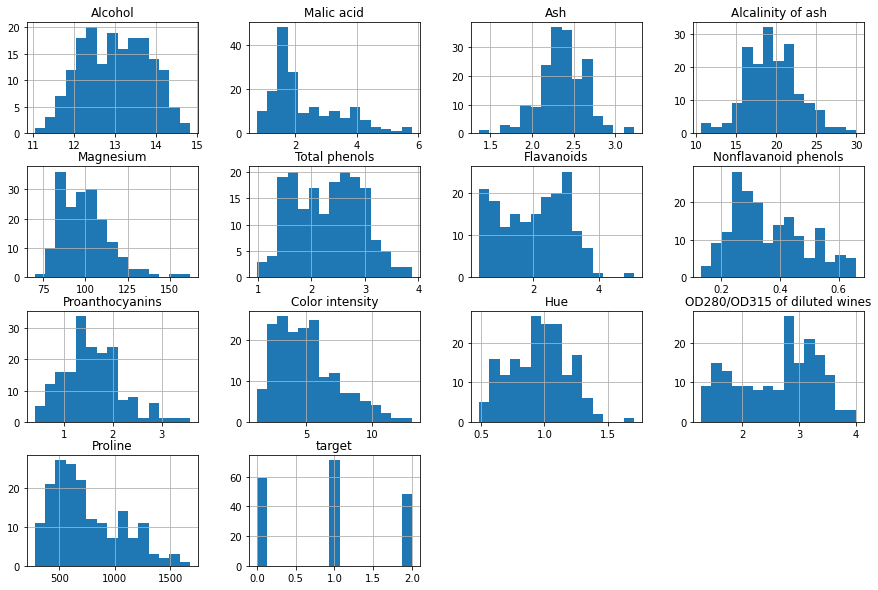

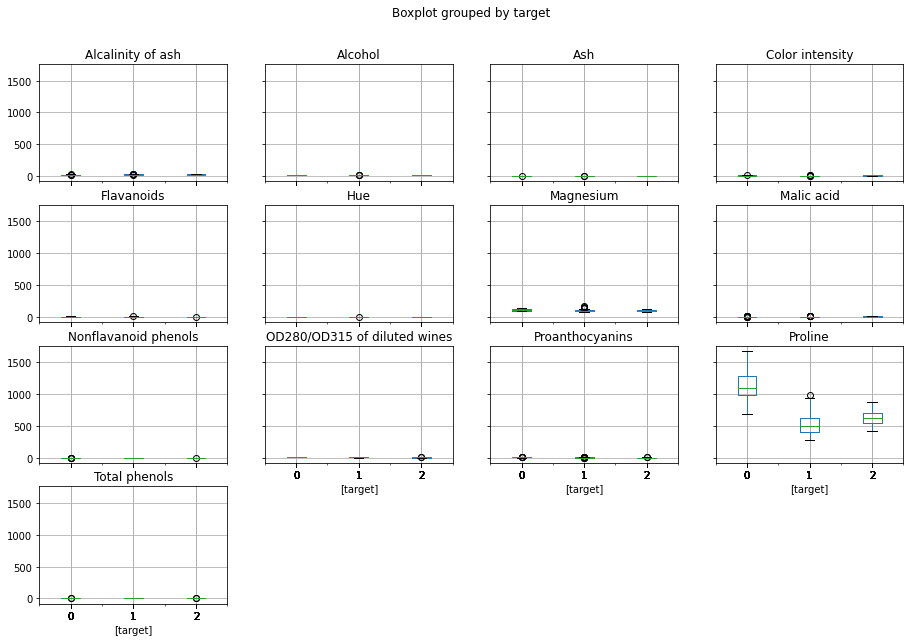

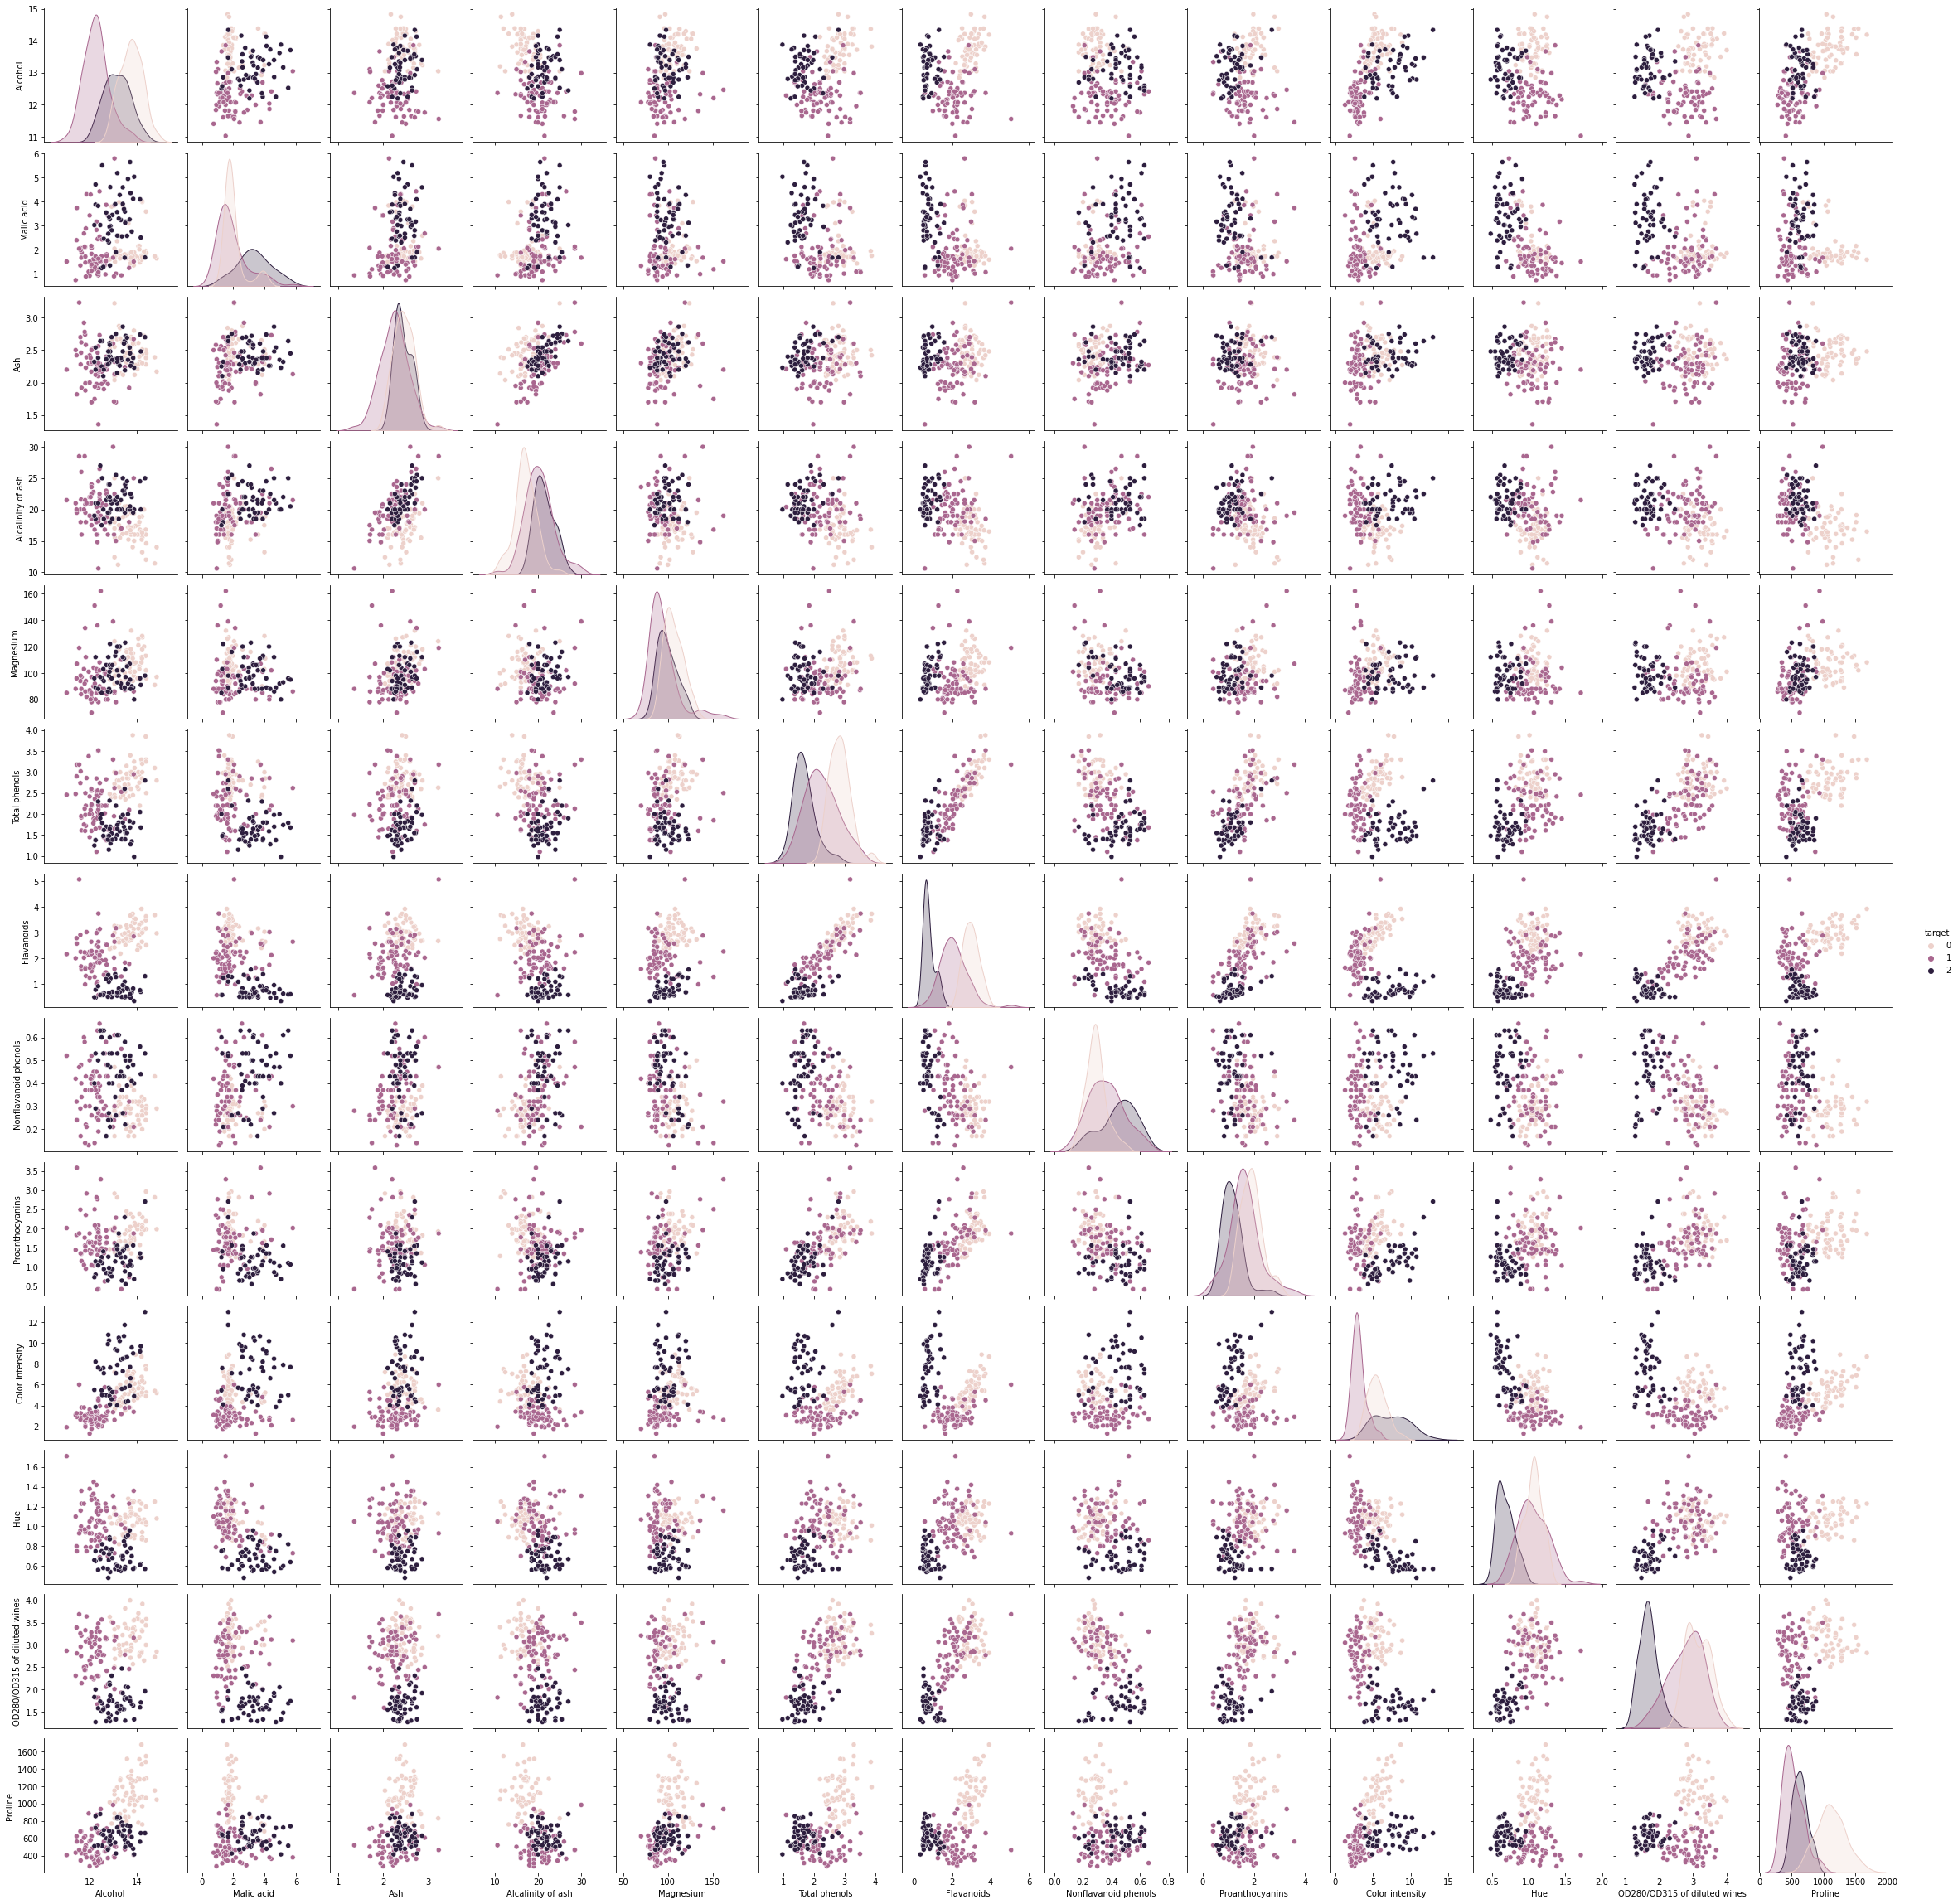

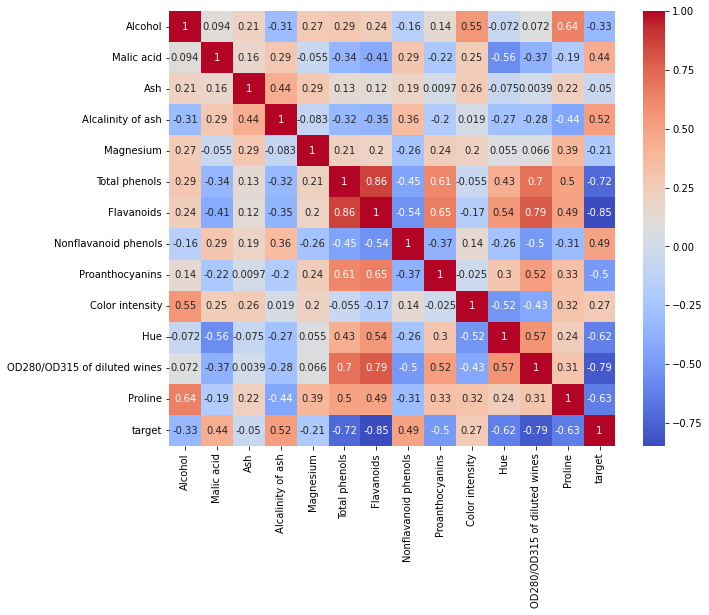

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Distributions
wine_df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box Plots
wine_df.boxplot(by='target', figsize=(15, 10))
plt.show()

# Pairwise Relationships
sns.pairplot(wine_df, hue='target')
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4.2 Implementation

### 4.2.1 Implementing k Nearest Neighbors(kNN) from Scratch

#### Step 1: Define the Euclidean Distance Function

The kNN algorithm relies on distance calculations. Here, we'll use the Euclidean distance.

In [15]:
import numpy as np

def euclidean_distance(row1, row2):
    """
    Calculates the distance between two rows using euclidian distance
    
    Input:
    row1 = vector array 1
    row2 = vector array 2
    
    Output:
    euc
    """
    return np.sqrt(np.sum((row1 - row2) ** 2))

#### Step 2: Define the kNN Algorithm

The core of the kNN algorithm involves finding the k nearest neighbors and performing a majority vote.

In [16]:
def k_nearest_neighbors(train, test_row, num_neighbors):
    """
    Finds the 'k' closest training neighbors to a given test, 
    based on Euclidean distance between the two instances. 
    
    Input:
    train = training dataset
    test = the data instance to find the nearest neighbour of
    num_neighbors = The number of nearest neighbors to find
    
    Output:
    neighbors = the list of nearest neighbours
    """
    
    #an empty list to hold the distances between the test row and each item in the train dataset
    distances = []
    
    #iterate through the training dataset
    for train_row in train:
        
        #calculate the euclidean distance between the test_row and the current train_row
        dist = euclidean_distance(test_row, train_row[:-1])
        
        #add the calculated distances to the distance list
        distances.append((train_row, dist))
        
    #the list of distances are sorted based on the distance values (the smallest distances are in the front)
    distances.sort(key=lambda tup: tup[1])
    
    #This selects the first few instances from the distances list and 
    #then retrieves the actual data points from the sorted list
    neighbors = [distances[i][0] for i in range(num_neighbors)]
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    """
    Implements the prediction part of the k-NN algorithm for to classify the datapoint.
    It finds the nearest neighbors of the test row and then predicts the class of that test instance 
    based on the most common class among its neighbors
    
    Input:
    train = training dataset
    test = the data instance to find the nearest neighbour of
    num_neighbors = The number of nearest neighbors to find
    
    Output:
    prediction = the class label that is predicted
    """
    
    #finds the nearest neighbours to the datapoint
    neighbors = k_nearest_neighbors(train, test_row, num_neighbors)
    
    #extracts the class labels of the nearest neighbors.
    #It is assuming that the class label is the last element of each datapoint of the 'train' dataset
    output_values = [row[-1] for row in neighbors]
    
    #Finds the most common class label(mode) in the nearest neighbours. This uses a majority voting system.
    #The class label that appears most frequently is chosen
    prediction = max(set(output_values), key=output_values.count)
    return prediction

#### Step 3: Test the kNN Algorithm

We need to test our kNN implementation on the Wine dataset.

In [17]:
def kNN_model(X_train, y_train, X_test, k):
    """
    This is a wrapper that applies the k-NN algorithm to the test rows using a given training dataset. 
    
    Input:
    X_train = The feature set for the training data.
    y_train = The labels for the training data.  
    X_test = The feature set for the test data
    k = The number of nearest neighbors to consider in the k-NN algorithm
    
    Output:
    prediction = the class label that is predicted
    """
    #An empty list to store the predictions for the test data
    predictions = []
    
    #Iterate through all the rows of the test dataset
    for row in X_test:
        
        #Combine the feature set X_train and the labels y_train into one array
        label = predict_classification(np.column_stack((X_train, y_train)), row, k)
        
        #get the predicted label and add to the predictions list
        predictions.append(label)
    return predictions

### 4.2.2 Implementing Decision Tree Using sklearn

#### Step 4: Use Decision Tree from sklearn

We'll use the Decision Tree classifier from the sklearn library.

In [18]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_model(X_train, y_train, X_test):
    """
    This is a wrapper that applies the decision tree model to the test rows using a given training dataset. 
    
    Input:
    X_train = The feature set for the training data.
    y_train = The labels for the training data.  
    X_test = The feature set for the test data
    
    Output:
    prediction = the class label that is predicted
    """
    model = DecisionTreeClassifier(random_state=35)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

### 4.2.3 Implementing Logistic Regression Using sklearn

#### Step 5: Use Logistic Regression from sklearn

We will use Logistic regression as it is good for multi-class classification problems. It is simple, fast and effective for linearly sepearble classes.

In [19]:
from sklearn.linear_model import LogisticRegression

def logistic_reg_model(X_train, y_train, X_test):
    """
    This is a wrapper that applies the logistic regression model to the test rows using a given training dataset. 
    
    Input:
    X_train = The feature set for the training data.
    y_train = The labels for the training data.  
    X_test = The feature set for the test data
    
    Output:
    prediction = the class label that is predicted
    """
    model = LogisticRegression(random_state=35)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

### 4.2.4 Implementing Random Forest Using sklearn

#### Step 6: Use Random Forest from sklearn

We will use Logistic regression as it is good for multi-class classification problems. It is simple, fast and effective for linearly sepearble classes.

In [20]:
from sklearn.ensemble import RandomForestClassifier

def random_frst_model(X_train, y_train, X_test):
    """
    This is a wrapper that applies the random forest model to the test rows using a given training dataset. 
    
    Input:
    X_train = The feature set for the training data.
    y_train = The labels for the training data.  
    X_test = The feature set for the test data
    
    Output:
    prediction = the class label that is predicted
    """
    model = RandomForestClassifier(n_estimators=5, random_state=35)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

### 4.2.2 Evaluating the Models

#### Step 5: Evaluate the Models

We'll use accuracy as the metric for evaluation.

In [21]:
# We are evaluating two different k values (number of neighbours for kNN). We set them here:
a = 8
b = 4

In [22]:
from sklearn.metrics import accuracy_score
selected_features_s = wine_df_s[selected]
selected_features_m = wine_df_m[selected]
selected_features = wine_df[selected]

X_train, X_test, y_train, y_test = split_data(selected_features_s, labels, s_scaler)

# # Predictions for Standardized Scalar
# # Predictions using kNN
knn_a_predictions_s = kNN_model(X_train, y_train, X_test, a)
knn_b_predictions_s = kNN_model(X_train, y_train, X_test, b)

# # Predictions using Decision Tree
dt_predictions_s = decision_tree_model(X_train, y_train, X_test)

# # Logistic Regression Model
log_predictions_s = logistic_reg_model(X_train, y_train, X_test)

# # Random Forest
rf_predictions_s = random_frst_model(X_train, y_train, X_test)

# # Predictions for Standardized Scalar
# # Predictions using kNN
# knn_a_predictions_s = kNN_model(X_train_s_scale, y_train, X_test_s_scale, a)
# knn_b_predictions_s = kNN_model(X_train_s_scale, y_train, X_test_s_scale, b)

# # Predictions using Decision Tree
# dt_predictions_s = decision_tree_model(X_train_s_scale, y_train, X_test_s_scale)

# # Logistic Regression Model
# log_predictions_s = logistic_reg_model(X_train_s_scale, y_train, X_test_s_scale)

# # Random Forest
# rf_predictions_s = random_frst_model(X_train_s_scale, y_train, X_test_s_scale)

TypeError: split_data() takes 2 positional arguments but 3 were given

Evaluation for min-max scaled dataset.

In [ ]:
# Predictions Min-Max Scalar
# Predictions using kNN
knn_a_predictions_m = kNN_model(X_train_mm_scale, y_train, X_test_mm_scale, a)
knn_b_predictions_m = kNN_model(X_train_mm_scale, y_train, X_test_mm_scale, b)

# Predictions using Decision Tree
dt_predictions_m = decision_tree_model(X_train_mm_scale, y_train, X_test_mm_scale)

# Logistic Regression Model
log_predictions_m = logistic_reg_model(X_train_mm_scale, y_train, X_test_mm_scale)

# Random Forest
rf_predictions_m = random_frst_model(X_train_mm_scale, y_train, X_test_mm_scale)

Evaluation for non-scaled dataset.

In [ ]:
# Predictions without scaling
# Predictions using kNN
knn_a_predictions = kNN_model(X_train, y_train, X_test, a)
knn_b_predictions = kNN_model(X_train, y_train, X_test, b)

# Predictions using Decision Tree
dt_predictions = decision_tree_model(X_train, y_train, X_test)

# Logistic Regression Model
log_predictions = logistic_reg_model(X_train, y_train, X_test)

# Random Forest
rf_predictions = random_frst_model(X_train, y_train, X_test)


Evaluate the differences in accuracy

In [ ]:
# # Evaluate kNN
knn_accuracy_a_s = accuracy_score(y_test, knn_a_predictions_s)
knn_accuracy_b_s = accuracy_score(y_test, knn_b_predictions_s)

knn_accuracy_a_m = accuracy_score(y_test, knn_a_predictions_m)
knn_accuracy_b_m = accuracy_score(y_test, knn_b_predictions_m)

knn_accuracy_a = accuracy_score(y_test, knn_a_predictions)
knn_accuracy_b = accuracy_score(y_test, knn_b_predictions)

# # Evaluate Decision Tree
dt_accuracy_s = accuracy_score(y_test, dt_predictions_s)
dt_accuracy_m = accuracy_score(y_test, dt_predictions_m)
dt_accuracy = accuracy_score(y_test, dt_predictions)


# # Evaluate Logistic Regression Model
log_accuracy_s = accuracy_score(y_test, log_predictions_s)
log_accuracy_m = accuracy_score(y_test, log_predictions_m)
log_accuracy = accuracy_score(y_test, log_predictions)


# # Evaluate Random Forest Model
rf_accuracy_s = accuracy_score(y_test, rf_predictions_s)
rf_accuracy_m = accuracy_score(y_test, rf_predictions_m)
rf_accuracy = accuracy_score(y_test, rf_predictions)

ka = 'kNN(k=' + str(a) + ')'
kb = 'kNN(k=' + str(b) + ')'

# Create a dictionary with model names and their corresponding accuracies
accuracy_dict = {
    'Model': [ka, kb, 'Decision Tree', 'Logistic Regression', 'Random Forest'],
    'S Scale Accuracy': [knn_accuracy_a_s, knn_accuracy_b_s, dt_accuracy_s, log_accuracy_s, rf_accuracy_s],
    'MM Scale Accuracy': [knn_accuracy_a_m, knn_accuracy_b_m, dt_accuracy_m, log_accuracy_m, rf_accuracy_m],
    'No Scale Accuracy':[knn_accuracy_a, knn_accuracy_b, dt_accuracy, log_accuracy, rf_accuracy]
}

# Convert dictionary to DataFrame
accuracy_df = pd.DataFrame(accuracy_dict)

accuracy_df.head()